# Basic Image Manipulation

In this notebook we will cover how to perform image transformations including:

- Accessing and manipulating images pixels
- Image resizing
- Cropping
- Flipping

In [43]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

## Original Image

[[255 255 255 255 255 245 224 208 201 201 209 224 246 255 255 255 255 255]
 [255 255 255 252 216 184 176 175 169 175 176 173 182 217 252 255 255 255]
 [255 255 248 195 173 180 186 183 182 184 184 184 180 176 197 249 255 255]
 [255 251 196 174 183 183 182 179 175 174 178 181 186 169 166 201 252 255]
 [255 216 167 177 183 180 167 164 164 164 164 167 180 178 188 172 217 255]
 [245 182 186 181 180 163 166 167 166 166 167 166 164 183 181 183 185 246]
 [224 173 180 184 166 165 165 164 166 166 164 166 164 166 186 170 166 227]
 [207 171 185 178 164 167 167 170 164 166 166 165 168 163 179 179 167 209]
 [200 160 176 173 207 212 224 221 224 178 227 209 233 202 168 186 173 201]
 [198 182 186 167 212 228 221 221 225 212 231 225 226 189 172 185 178 201]
 [207 167 181 177 166 173 168 173 166 177 166 170 166 164 179 182 173 209]
 [224 171 186 184 164 164 164 164 165 163 164 164 165 166 185 169 165 226]
 [244 184 184 183 180 164 166 167 166 167 167 166 163 181 179 186 183 246]
 [255 214 173 183 183 180

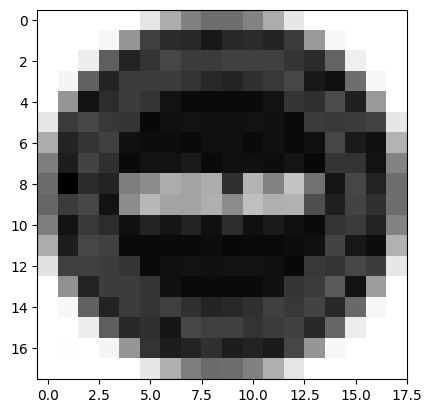

In [44]:
# Read image as gray scale.
cb_img = cv2.imread("datos/BasicImageManipulation/logo_18x18.png", 0)

# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap="gray")
print(cb_img)

## Accessing individual pixels

For accessing any pixel in a numpy matrix, you have to use matrix notation such as matrix[r,c], where the r is the row number and c is the column number. Also note that the matrix is 0-indexed.

For example, if you want to access the first pixel, you need to specify matrix[0,0].

In [45]:
# print the first pixel of the image
print(cb_img[0, 0])
# print an orange pixel of the udlap logo
print(cb_img[1, 6])

255
176


## Modifying Image Pixels

The intensity values of pixels can be modified as we can see in the following code.

[[255 255 255 255 255 245 224 208 201 201 209 224 246 255 255 255 255 255]
 [255 255 255 252 216 184 176 175 169 175 176 173 182 217 252 255 255 255]
 [255 255 248 195 173 180 186 183 182 184 184 184 180 176 197 249 255 255]
 [255 251 196 174 183 183 182 179 175 174 178 181 186 169 166 201 252 255]
 [255 216 167 177 183 180 167 164 164 164 164 167 180 178 188 172 217 255]
 [245 182 186 181 180 163 166 167 166 166 167 166 164 183 181 183 185 246]
 [224 173 180 184 166 165 165 164 166 166 164 166 164 166 186 170 166 227]
 [207 171 185 178 164 167 167 170 164 166 166 165 168 163 179 179 167 209]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [207 167 181 177 166 173 168 173 166 177 166 170 166 164 179 182 173 209]
 [224 171 186 184 164 164 164 164 165 163 164 164 165 166 185 169 165 226]
 [244 184 184 183 180 164 166 167 166 167 167 166 163 181 179 186 183 246]
 [255 214 173 183 183 180

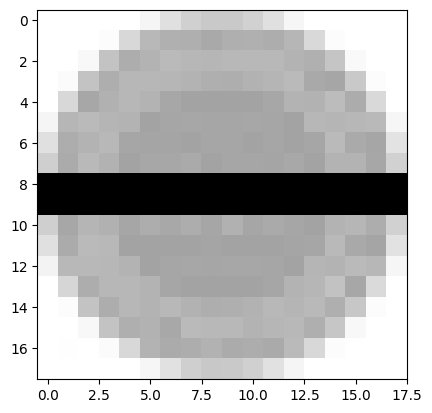

In [46]:
cb_img_copy = cb_img.copy()
# Create a stripe of black pixels in the image at the 
for i in range(0, 18):
    cb_img_copy[9, i] = 0
    cb_img_copy[8, i] = 0

plt.imshow(cb_img_copy, cmap="gray")
print(cb_img_copy)

## Cropping Images

Cropping images is simply achieved by selecting the range that we want of the image.

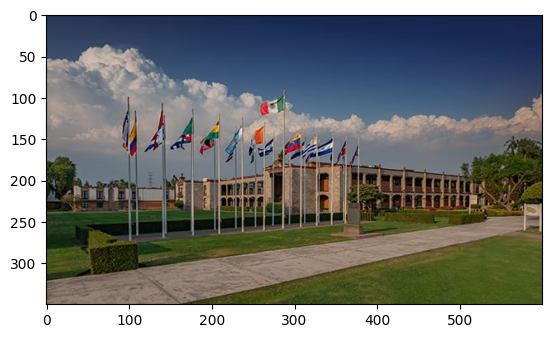

In [47]:
udlap_image_bgr = cv2.imread("datos/BasicImageManipulation/udlap_flags.jpg")
# Convert the image from BGR to RGB for the matplotlib rendering.
udlap_image_rgb = cv2.cvtColor(udlap_image_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(udlap_image_rgb)

## Crop out a region of the image

Suppose we want to extract the area containing the flags. To do this, we first identify the region of interest in the image using imshow. Let's assume the flags are located within the following coordinates:

Y-axis: Between 50 and 200.

X-axis: Between 100 and 400.

We can use NumPy's slicing notation to crop the image as follows:

``` python
cropped_region = udlap_image_rgb[50:200, 100:400]
```

width:  300
height:  150


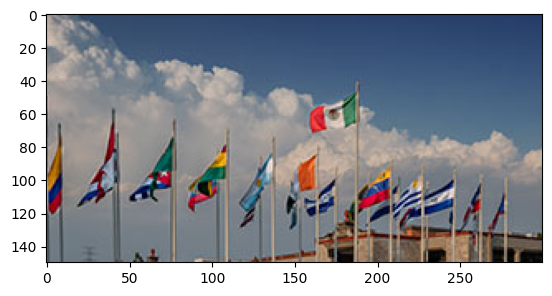

In [48]:
cropped_region = udlap_image_rgb[50:200, 100:400]
plt.imshow(cropped_region)
print("width: ", cropped_region.shape[1])
print("height: ", cropped_region.shape[0])

We can see that after cropping the image, the shape of the image changed

## Resizing Images

The function resize resizes the image src down to or up to the specified size. The size and type are derived from the src,dsize,fx, and fy.

**Function Syntax**

``` python
dst = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )
```

dst: output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.

The function has 2 required arguments:

src: input image

dsize: output image size

Optional arguments that are often used include:

fx: Scale factor along the horizontal axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜

fy: Scale factor along the vertical axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜

The output image has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.

### Notes:

- The argument interpolation is to specify the algorithm used to resize the image
- The default interpolation is cv2.INTER_LINEAR
- If the new size specified in cv2.resize() is larger than the original image, the image is upscaled (enlarged) to fit the new size using interpolation.

### OpenCV Documentation

**`resize()`**: <a href="https://docs.opencv.org/4.5.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d" target="_blank">Documentation link</a>

### Method 1: Specifying Scaling Factor using fx and fy

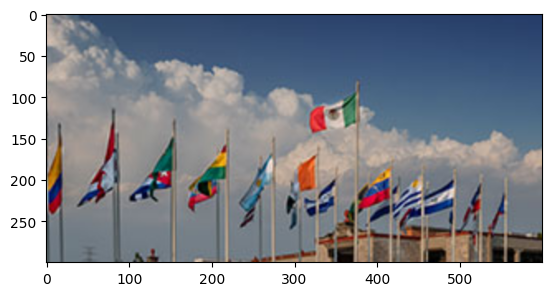

In [49]:
resized_cropped_region_2x = cv2.resize(cropped_region, None, fx=2, fy=2)
plt.imshow(resized_cropped_region_2x)

### Method 2: Specifying exact size of the output image

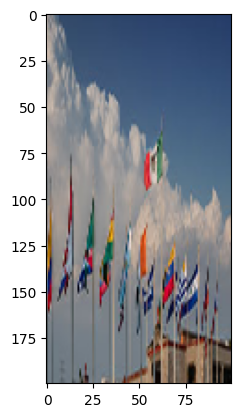

In [50]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

# Resize background image to sae size as logo image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

### Resize while maintaining aspect ratio

To resize an image while maintaining its aspect ratio, we start by calculating the scaling factor (aspect ratio) by dividing the desired width by the current width of the image. Next, multiply the current height by this aspect ratio to determine the new height, ensuring the image's proportions remain intact. Convert the new height to an integer, as image dimensions must be whole numbers. Finally, create a tuple with the new width and height, and pass it as the dsize argument to the resize function.

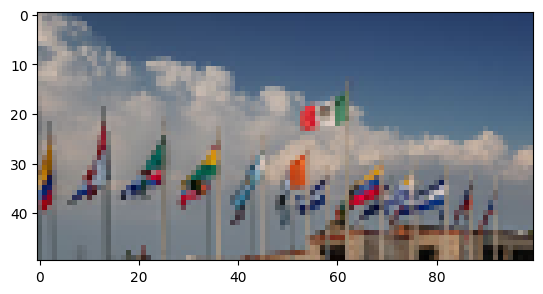

In [51]:
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

# Resize image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

## Save and show the cropped resized image

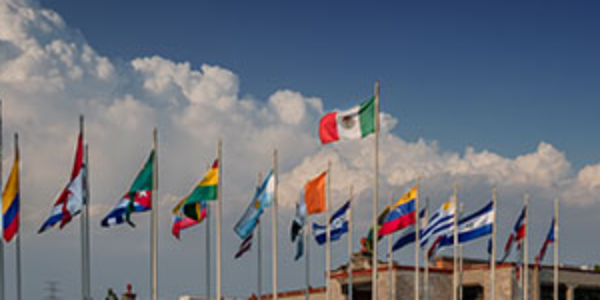

In [52]:
# Swap channel order
resized_cropped_region_2x = cv2.cvtColor(resized_cropped_region_2x, cv2.COLOR_BGR2RGB)

# Save resized image to disk
cv2.imwrite("datos/BasicImageManipulation/Saved/resized_cropped_region_2x.png", resized_cropped_region_2x)

# Display the cropped and resized image
Image(filename="datos/BasicImageManipulation/Saved/resized_cropped_region_2x.png")

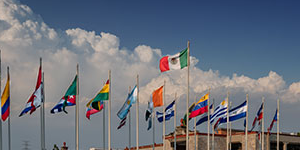

In [53]:
# Swap channel order
cropped_region = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2RGB)

# Save cropped 'region'
cv2.imwrite("datos/BasicImageManipulation/Saved/cropped_region.png", cropped_region)

# Display the cropped imag
Image(filename="datos/BasicImageManipulation/Saved/cropped_region.png")

## Flipping Images

The function **`flip`** flips the array in one of three different ways (row and column indices are 0-based):

**Function Syntax**
``` python
dst = cv.flip( src, flipCode )
```

`dst`: output array of the same size and type as src.

The function has **2 required arguments**:
    
1. `src`:	input image
2. `flipCode`: a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.


### OpenCV Documentation

**`flip`**: <a href="https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441" target="_blank">Documentation link</a>

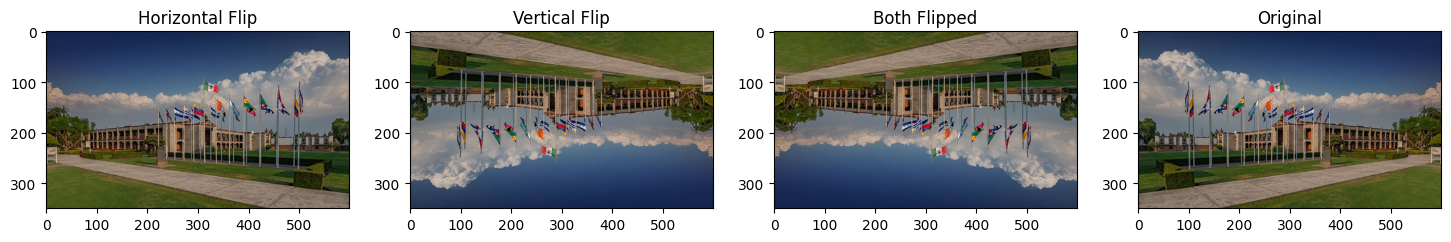

In [55]:
udlap_image_rgb_flipped_horz = cv2.flip(udlap_image_rgb, 1)
udlap_image_rgb_flipped_vert = cv2.flip(udlap_image_rgb, 0)
udlap_image_rgb_flipped_both = cv2.flip(udlap_image_rgb, -1)

# Show the images
plt.figure(figsize=(18, 5))
plt.subplot(144);plt.imshow(udlap_image_rgb);plt.title("Original");
plt.subplot(141);plt.imshow(udlap_image_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(udlap_image_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(udlap_image_rgb_flipped_both);plt.title("Both Flipped");